# Exploring the Weather in Athens over a period of more than 50 years.

---

> Author: Georgios Zachariadis

## Obtain the Data

* Data downloaded from the National Oceanic and Atmospheric Administration's National Centers for Environmental Information (https://www.ncdc.noaa.gov/cdo-web/) and in particular https://www.ncdc.noaa.gov/cdo-web/search. 

* As we are focusing on Athens, we will use the data from the Hellinikon weather station and we will concentrate on the average daily temperature and precipitation.

* We will try to investigate the completeness of the data.

* To fill in any missing data we used an alternative dataset available from https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f; this dataset covers only the period from 2010-2019.

### First of all, load useful modules

In [1]:
import pandas as pd

import numpy as np

### Below we load the dataset from National Oceanic and Atmospheric Administration's National Centers for Environmental Information and we do EDA.

In [2]:
df_national = pd.read_csv('datasets/2760641.csv')
df_national

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.0,NaN,NaN,18.5,10.2
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.0,NaN,NaN,14.4,7.0
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.0,NaN,NaN,15.8,9.6
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.0,NaN,NaN,18.8,7.3
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.0,NaN,NaN,17.9,8.4
...,...,...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.0,NaN,16.6,NaN,NaN
23247,GR000016716,"HELLINIKON, GR",2020-12-28,6.6,NaN,14.8,18.2,11.9
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.0,NaN,16.3,19.9,12.5
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.0,NaN,16.4,19.9,14.8


In [3]:
df_national.nunique()

STATION        1
NAME           1
DATE       23251
PRCP         370
SNWD           9
TAVG         346
TMAX         372
TMIN         318
dtype: int64

### We could observe that there are not any dublicate rows, so we needn't drop any rows.

In [4]:
df_national.isna().sum()

STATION        0
NAME           0
DATE           0
PRCP         478
SNWD       23221
TAVG        2311
TMAX         944
TMIN         833
dtype: int64

### We want to investigate weather in Athens, but we could conclude that there is a battery of missing values (Check below)
* PRCP (478)
* SNWD (23221)        
* TAVG (2311)     
* TMAX (944)
* TMIN (833)    

### So we are going to fill these missing values using dataset from 'Hellenic Data Service'.

In [5]:
# From documentation we got dataset's columns names, as mentioned below.
df_hellenic = pd.read_csv('datasets/athens.csv', names=["DATE", "TAVG", "TMAX", "TMIN", "MEANHUMID", "MAXHUMID", "MINHUMID", "MEANHPA"
                                      , "MAXHPA", "MINHPA", "PRCP", "MEAN_AIRVELOCITY", "AIR_DIRECTION", "AIR_GUST"])
df_hellenic

,DATE,TAVG,TMAX,TMIN,MEANHUMID,MAXHUMID,MINHUMID,MEANHPA,MAXHPA,MINHPA,PRCP,MEAN_AIRVELOCITY,AIR_DIRECTION,AIR_GUST
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


In [6]:
df_hellenic.nunique()

DATE                3652
TAVG                 316
TMAX                 315
TMIN                 316
MEANHUMID            550
MAXHUMID              58
MINHUMID              71
MEANHPA              337
MAXHPA               323
MINHPA               356
PRCP                 131
MEAN_AIRVELOCITY     174
AIR_DIRECTION         17
AIR_GUST             317
dtype: int64

In [7]:
# we want to keep specific data columns
df_hellenic = df_hellenic[['DATE', 'TAVG', 'TMAX', 'TMIN', 'PRCP']]

# we combine first dataframe with the second in column DATE.
result_df = df_national.set_index('DATE').combine_first(df_hellenic.set_index('DATE')).reset_index()

result_df


,DATE,NAME,PRCP,SNWD,STATION,TAVG,TMAX,TMIN
0,1955-01-01,"HELLINIKON, GR",0.0,NaN,GR000016716,NaN,18.5,10.2
1,1955-01-02,"HELLINIKON, GR",2.0,NaN,GR000016716,NaN,14.4,7.0
2,1955-01-03,"HELLINIKON, GR",0.0,NaN,GR000016716,NaN,15.8,9.6
3,1955-01-04,"HELLINIKON, GR",0.0,NaN,GR000016716,NaN,18.8,7.3
4,1955-01-05,"HELLINIKON, GR",0.0,NaN,GR000016716,NaN,17.9,8.4
...,...,...,...,...,...,...,...,...
24099,2020-12-27,"HELLINIKON, GR",0.0,NaN,GR000016716,16.6,NaN,NaN
24100,2020-12-28,"HELLINIKON, GR",6.6,NaN,GR000016716,14.8,18.2,11.9
24101,2020-12-29,"HELLINIKON, GR",0.0,NaN,GR000016716,16.3,19.9,12.5
24102,2020-12-30,"HELLINIKON, GR",0.0,NaN,GR000016716,16.4,19.9,14.8


### Check dublicates

In [8]:
# We add a 'YEAR' column as well, in order to get data, ONLY between 2010-2019.
result_df['DATE']= pd.to_datetime(result_df['DATE'])
result_df['YEAR'] = pd.DatetimeIndex(result_df['DATE']).year
dates_to_fill = result_df[(result_df.YEAR >= 2010) & (result_df.YEAR <=2019)]
dates_to_fill.isna().sum()

DATE          0
NAME        853
PRCP          0
SNWD       3635
STATION     853
TAVG          0
TMAX          0
TMIN          0
YEAR          0
dtype: int64

### Save final dataframe

In [9]:
result_df.to_csv('datasets/results.csv')

### Deviation of Summer Temperatures

The Hellenic National Meteorological Service has published a report on extreme weather events for 2020. The report is available at http://www.hnms.gr/emy/en/pdf/2020_GRsignificantEVENT_en.pdf. In page 7 of the report there is a graph showing the mean summer temperature deviation from a baseline of 1971-2000.

We will create our own version of the graph, using a baseline of 1974-1999. The line that runs through the graph is the 10 years rolling avarege of the deviation from the mean. 

In [10]:
# As we want summers between 1974-1999 we are going to make a new column in our dataframe where we save a bool value
# which shows that date of the reading row is belonged to Summer Season.
summer_boolean = [True if date.month >=6 and date.month <=8 else False for date in result_df['DATE']]
result_df['IS_SUMMER'] = summer_boolean
whole_summer_df = result_df[result_df.IS_SUMMER ==True]

### We implement some important methods which help us find Summers' temperatures and their difference in means.

In [11]:
# method to get summer mean per year and the baseline(1974-1999)
# returns a dictionary with all summer means and an array with baseline means
def get_summer_means_with_baseline(dataframe):
    # dictionary where we are going to store our mean temperatures
    # key: year
    # value: mean temperature
    all_means = {}
    
    # list where we save baseline period summer means(1974-1999)
    baseline_means = []
    
    #save each year in a list
    summers = dataframe['YEAR'].unique()
    
    for summer in summers:
        # take current summer temperatures and calculate the mean of all TAVG
        current_summer_df = dataframe[dataframe['YEAR'] == summer]
        all_means[summer] = current_summer_df['TAVG'].astype(float).mean()
        if summer >= 1974 and summer <= 1999:
            baseline_means.append(all_means[summer])
    return all_means, np.array(baseline_means)

# method to get summer mean differences between baseline
# returns a dictionary with all summer means differences
def get_summer_means_differences(means, baseline_mean):
    differences = {}
    for year,mean in means.items():
        differences[year] = means[year] - baseline_mean
    return differences

# initialize our variables
summer_means, baseline_means = get_summer_means_with_baseline(whole_summer_df)
differ = get_summer_means_differences(summer_means, baseline_means.mean())

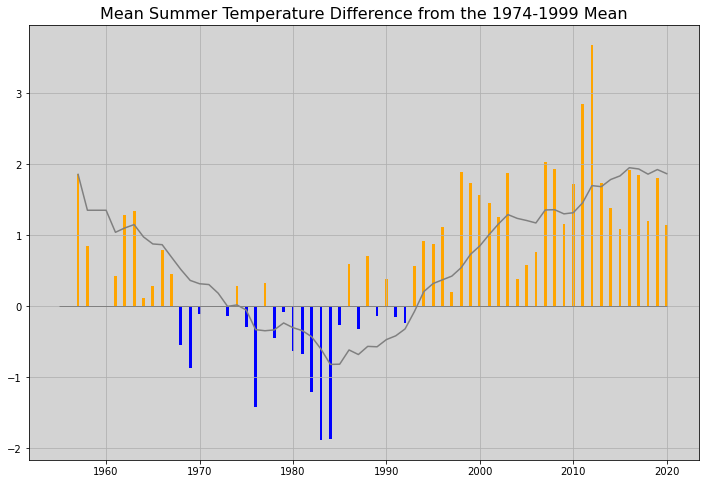

In [12]:
# import ploting modules
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12,8))

x_axis= np.array(list(differ.keys()))
y_axis = np.array(list(differ.values()))

# initialize a mask for our values, in order to change color between negative and positive values
below_0 = y_axis < 0
over_0 = y_axis >= 0

# initialize a temp dataframe, which helps us to calculate the 10 years rolling average
df_2 = pd.DataFrame(y_axis, columns = ['means'])
df_2['year'] = x_axis
df_2['rolling_average'] = df_2.means.rolling(10, min_periods=1).mean()

# plotting the bars with the 10 years rolling average.
plt.bar(x_axis[below_0], y_axis[below_0], color = 'blue', width=0.3)
plt.bar(x_axis[over_0], y_axis[over_0], color = 'orange', width=0.3)
plt.plot(df_2[ 'year' ], df_2[ 'rolling_average' ], 'gray')
ax.hlines(y=0 ,xmin=1955, xmax=2020, linewidth=1, color='gray')
ax.set_facecolor('lightgray')
ax.set_title('Mean Summer Temperature Difference from the 1974-1999 Mean', fontsize = 16)
plt.grid()
plt.show()

### From the graph above we could observe the fact that in 80's we had more cold summer considering the baseline. However, from 00's and then, we see a strong hike in differences. This shows us the big impact of climate change.

## Evolution of Daily Temperatures

We will get the average temperate for each year for the full period from 1955 to 2020. We will then create a plot showing the daily temperature for each year. The line corresponding to each year will be smoothed by using a 30 days rolling average. The lines are colored from light orange to dark orange, progressing through the years in ascending order.

On that plot we will overlay a line showing the average daily temperature for the baseline period of 1974-1999 (that is the black line). The line will also be smoothed usng a 30 years rolling average.

In [13]:
# we add a new column 'MONTH' which helps us to store each month for better data handling.
result_df['MONTH'] = pd.DatetimeIndex(result_df['DATE']).month_name()
result_df['MONTH'] = result_df['MONTH'].apply(lambda x: x[:3])

# we add 'DAY_INDEX' column as well, for keeping current day of the year for the baseline period.
# This gives us the opportunity to calculate the 'TAVG' of all years between (1974-1999)
# and keep the mean of these temperatures for each day of the year.
# To make it clear, we want to measure the TAVG of all 1st January dates, so we keep the TAVG
# and take the mean of these values, as the TAVG of the period 1974-1999.
result_df['DAY_INDEX'] = pd.DatetimeIndex(result_df['DATE']).dayofyear

# take indexes for axis_x line to plot the strings.
months = result_df['MONTH'].unique()
months_first_index = []
for i in range(len(months)):
    months_first_index.append(result_df[result_df['MONTH'] == months[i]].first_valid_index())


# method to get all annual average temperatures
# returns a dictionary with key: year and value: the average temperature of the year.
def get_annual_average_temperature(dataframe):
    # dictionary where we are going to store our average temperatures
    # key: year
    # value: average temperature
    annual_average = {}
    
    years = dataframe['YEAR'].unique()
    
    for year in years:
        # take current year and calculate the average of its 'TAVG'
        current_year_df = dataframe[dataframe['YEAR'] == year]
        annual_average[year] = current_year_df['TAVG'].astype(float).mean()
        
    return annual_average


# method to get all annual daily temperatures (with rolling average)
def get_annual_daily_temperatures(dataframe):
    # dictionary where we are going to store our daily temperatures
    # key: year
    # value: list with all temperatures (we want the 'rolling_average' value for each row!)
    annual_daily_temperatures = {}
    
    years = dataframe['YEAR'].unique()
    
    for year in years:
        # take current year and calculate the average of its 'TAVG'
        current_year_df = dataframe[dataframe['YEAR'] == year]
        annual_daily_temperatures[year] = np.array(current_year_df['rolling_avg'])
        
    return annual_daily_temperatures

# method to get all annual daily temperatures of the baseline period
def get_baseline_daily_temperatures(dataframe):
    # dictionary where we are going to store our daily temperatures
    # key: year
    # value: list with all temperatures (we want the 'TAVG' value for each row!)
    annual_baseline_temperatures = {}
    
    daysofyear = result_df['DAY_INDEX'].unique()
    
    for day in daysofyear:
        # take current day_index and calculate the average of its 'TAVG'
        current_day_df = dataframe[dataframe['DAY_INDEX'] == day]
        annual_baseline_temperatures[day] = current_day_df['TAVG'].astype(float).mean()
        
    return annual_baseline_temperatures

# as we got some error during compiling, we handle the wrong values
result_df = result_df.replace('---',np.nan, regex=True)

# we add a 'rolling_avg' column in our dataframe for calculating better the 30 years rolling average.
result_df['rolling_avg'] = result_df['TAVG'].rolling(30, min_periods=1).mean()

# initialize our data
annual_average_temperatures = get_annual_average_temperature(result_df)
ADT = get_annual_daily_temperatures(result_df)
baseline_df = result_df[(result_df.YEAR >= 1974) & (result_df.YEAR <=1999)]
ABT= get_baseline_daily_temperatures(baseline_df)

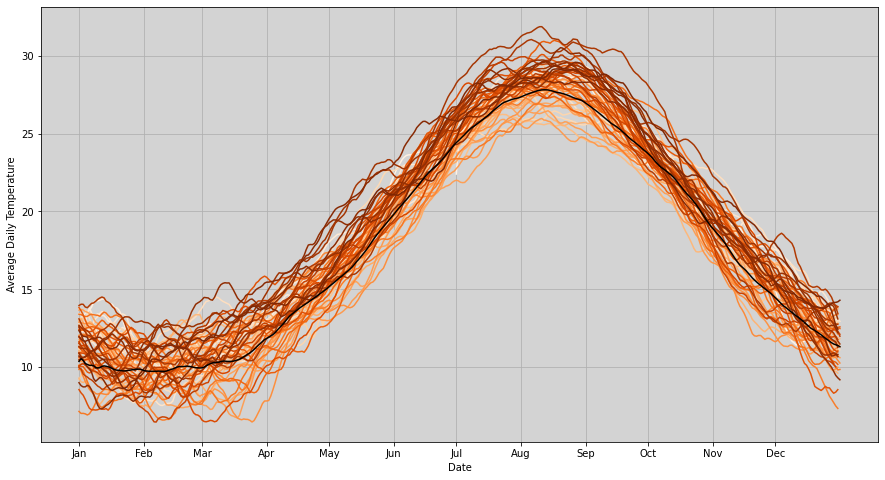

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# function that changes each line's color with color map:Orange
def ORANGE(ax):
    cm = plt.get_cmap('Oranges')
    lines = ax.lines
    colors = cm(np.linspace(0, 1, len(lines)))
    for line, c in zip(lines, colors):
        line.set_color(c)

baseline_data = list(ABT.values())
f, ax = plt.subplots(figsize=(15,8))
years = list(ADT.keys())
plt.xticks(months_first_index, months)

# plot each line
for year in years:
    plt.plot(ADT[year])
ORANGE(ax)

# initialize a temp dataframe for baseline rolling average
df_2 = pd.DataFrame(baseline_data, columns = ['means'])
df_2['rolling_average'] = df_2.means.rolling(30, min_periods=1).mean()
plt.plot(df_2['rolling_average'], 'k')
ax.set_facecolor('lightgray')
plt.xlabel('Date')
plt.ylabel('Average Daily Temperature')
plt.grid()
plt.show()

## Extreme Temperature Events

Another mesure used by climatologists is the number of extreme events. Extreme events are defined as those beyond 5% or 10% from the expected value. We will deal with extreme heat events going 10% above the baseline.

We will count the number of extreme temperature events per year, compared to the baseline of 1974-1999. The vertical axis is the percentage of extreme heat events calculated over the number of observations for each year. The gray line in the middle is the average percentage of extreme tempearture events of the baseline. The colour blue is used for those years where the percentage is below the baseline; otherwise the colour is orange.

In [15]:
# method to get all annual daily temperatures of the baseline period
def get_baseline_extreme_events(dataframe):
    # dictionary where we are going to store our daily temperatures
    # key: year
    # value: list with baseline_temperature for each day of the year and the extreme dates percentage,
    # in the 1st and 2nd index respectively
    extreme_events = {}
    
    daysofyear = result_df['DAY_INDEX'].unique()
    
    for day in daysofyear:
        # take current day_index and calculate the average of its 'TAVG'
        current_day_df = dataframe[dataframe['DAY_INDEX'] == day]
        
        # mean of each day of the year period 1974-1999.
        baseline_temperature = current_day_df['TAVG'].astype(float).mean()
        # store dates which are above the 10% of the baseline.
        extreme_dates = current_day_df[current_day_df['TAVG'].astype(float) > baseline_temperature + (0.1*baseline_temperature)]
        # store baseline_temperature and the percentage of each day in the baseline period.
        extreme_events[day] = [baseline_temperature, len(extreme_dates)/len(current_day_df)]
        
    return extreme_events

# method to calculate the percentage of extreme events per year
# returns a dictionary with key:year and value: percentage
def calculate_extreme_events_percentage(dataframe, baseline):
    extreme_events_per_year = {}
    years = dataframe['YEAR'].unique()
    
    for year in years:
        
        current_year_df = dataframe[dataframe['YEAR'] == year]
        if current_year_df.empty:
            continue
        extreme_dates = 0
        for i in range(len(current_year_df)):
            
            # compare current day of the year with baseline (if it's above 10%)
            if current_year_df['TAVG'].astype(float).iloc[i] > baseline[i] + 0.1*baseline[i]:
                extreme_dates+=1
                
        # handling the NaN values in order no to devide with zero.
        # store the percentage
        dev = len(current_year_df.TAVG.dropna())
        if dev == 0:
            extreme_events_per_year[year] = 0
        else:
            extreme_events_per_year[year] = extreme_dates/dev
     
    
    return extreme_events_per_year

# initialize the baseline dataframe.
baseline_df = result_df[(result_df.YEAR>=1974) & (result_df.YEAR<=1999)]
baseline = get_baseline_extreme_events(baseline_df)

# take only the baseline temperatures
baseline_temp = np.array(list(baseline.values()))[:,0]

# calculate the percentages of each year
extreme = calculate_extreme_events_percentage(result_df, baseline_temp)

# calculate the baseline percentage
baseline = np.array(list(baseline.values()))[:,1].mean()

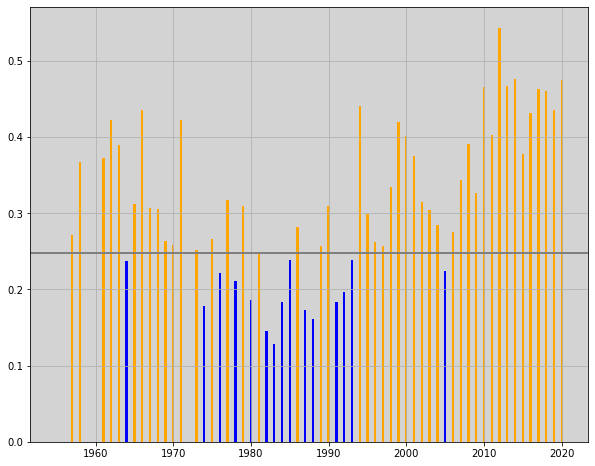

In [16]:
# import ploting module
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,8))

x_axis= np.array(list(extreme.keys()))
y_axis = np.array(list(extreme.values()))

# mask the values in order to change color in corresponding condition
below_0 = y_axis < baseline
over_0 = y_axis >= baseline

# plot our data
plt.bar(x_axis[below_0], y_axis[below_0], color = 'blue', width=0.3)
plt.bar(x_axis[over_0], y_axis[over_0], color = 'orange', width=0.3)
plt.axhline(baseline, color='gray', lw=2)
ax.hlines(y=0,xmin=1955, xmax=2020, linewidth=1, color='gray')
ax.set_facecolor('lightgray')
plt.grid()
plt.show()

## Precipitation

Continuing the thread on extreme events, another consideration is rainfall. The weather may or may not be drying up. We are, however, interested in whether precipication becomes more intense over time.

To see that, we will count the overall rainfall over the year and the number of rainy days in each year. Then, by dividing the rainfall by the number of rainy days we will get an indication of whether we are getting rain in more concentrated bursts. We will then create a plot showing the ratio of rainfall over rainy days over the years. On the plot we will overlay the 10 years rolling average.

In [17]:
# method which gives us the annual rainfall.
# returns a dicitonary with key:year and value:the rainfall
def get_rainfall(dataframe):
    # dictionary where we are going to store overall rainfall per year and the number of rainy days over each year.
    # key: Year
    # value: a list with the overall rainfall, the number of rainy days and the rainfall ratio, 
    # in 1st, 2nd and 3rd index respectively.
    
    rainfall_per_year = {}
    
    years = dataframe['YEAR'].unique()
    
    for year in years:
        current_year_df = dataframe[dataframe['YEAR'] == year]
        if current_year_df.empty:
            continue
        overall_rainfall = current_year_df['PRCP'].sum()
        # we calculate days where rainfall is a positive number!
        number_of_rainy_days = len(current_year_df[current_year_df['PRCP']>0.0])
        ratio = overall_rainfall/number_of_rainy_days
        rainfall_per_year[year] = [overall_rainfall, number_of_rainy_days, ratio]
        
    return rainfall_per_year

# initialize our variable
rainfall_per_year = get_rainfall(result_df)

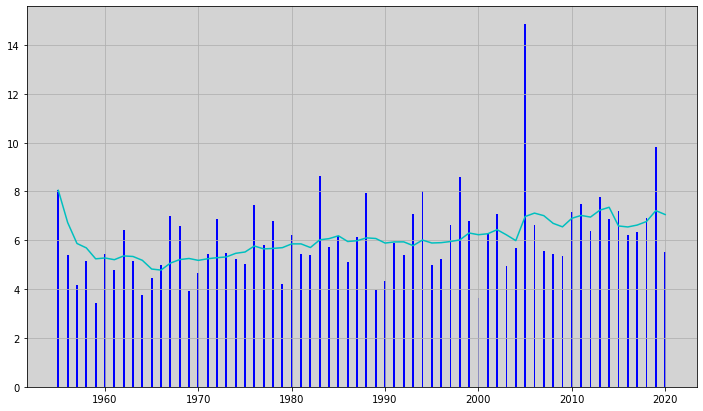

In [18]:
# import plot module
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(12,7))

y_axis = np.array(list(rainfall_per_year.values()))[:,2]
x_axis = np.array(list(rainfall_per_year.keys()))    
plt.bar(x_axis, y_axis, color = 'blue', width=0.2)

# initialize a temp dataframe to calculate the 10 years rolling average.
df_3 = pd.DataFrame(y_axis, columns = ['means'])
df_3['year'] = x_axis
df_3['rolling_average'] = df_3.means.rolling(10, min_periods=1).mean()

# plot our data
plt.plot(df_3[ 'year' ], df_3[ 'rolling_average' ], 'c-')
ax.hlines(y=0,xmin=1955, xmax=2020, linewidth=1, color='gray')
ax.set_facecolor('lightgray')
plt.grid()
plt.show()

### From the given graph we could conclude that rainfalls follow a distribution which is repeated every 10 years.